# Project : Indonesia Demography (Part 2: Data Exploration)

In the part 1 of the project, I have done web scraping and simple data preparation. With CSV file that I got from part 1, I will do simple data exploration.

## Import Library
For this part of project, I need to import these libraries:
1. **NumPy** for statistical exploration
2. **Pandas** for dealing with dataframe
3. **Matplotlib** and Seaborn for visualization


In [1]:
import numpy as np
import pandas as pd
import matplotlib as plt
import seaborn as sns

## Read CSV File

Data that I'm using is an CSV file that I got from part 1 of the project. I need to read that CSV file and save it in a DataFrame

In [2]:
demografi_df = pd.read_csv('demografi_indonesia.csv')

demografi_df.head()

,kode_bps,nama,ibu_kota,populasi,luas_km,pulau
0,11,Aceh,Banda Aceh,4494410.0,56500.51,Sumatra
1,12,Sumatra Utara,Medan,12982204.0,72427.81,Sumatra
2,13,Sumatra Barat,Padang,4846909.0,42224.65,Sumatra
3,14,Riau,Pekanbaru,5538367.0,87844.23,Sumatra
4,15,Jambi,Jambi,3092265.0,45348.49,Sumatra


## Exploration

Now that I have dataframe of Indonesia demography, I will start exploring the data.


### How much population in Indonesia?

In [3]:
population = demografi_df['populasi'].sum()

print('Indonesia population is ' + str(int(population)) + ' people')

Indonesia population is 238379489 people


### How wide is Indonesia land area?

In [4]:
land_area = demografi_df['luas_km'].sum()

print('Indonesia land area is ' + str(land_area) + ' km2 wide')

Indonesia land area is 1931573.4 km2 wide


### How many islands are there in Indonesia? What are the names?

In [33]:
islands = demografi_df['pulau'].sort_values(ascending=True).unique()
islands_count = len(islands)

print('There are ' + str(islands_count) + ' islands in Indonesia')
print('Name of islands in Indonesia :')
print(islands)

There are 7 islands in Indonesia
Name of islands in Indonesia :
['Jawa' 'Kalimantan' 'Maluku' 'Nusa Tenggara' 'Papua' 'Sulawesi' 'Sumatra']


### How much population and land area on each island in Indonesia?

In [30]:
group_by_island = demografi_df.drop(columns=['kode_bps']).groupby(['pulau']).sum().sort_values(by='pulau')
group_by_island

,populasi,luas_km
pulau,,
Jawa,136610590.0,129306.48
Kalimantan,14525994.0,578625.91
Maluku,2571593.0,87310.41
Nusa Tenggara,13074796.0,71296.03
Papua,3593803.0,424500.80
Sulawesi,17371782.0,193847.09
Sumatra,50630931.0,446686.68


**Visualization of Indonesia population by islands**

<Figure size 432x288 with 0 Axes>

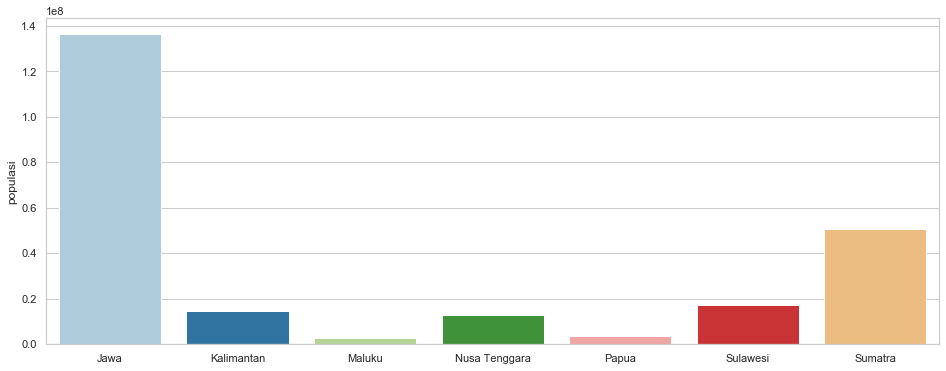

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()
sns.set_style("whitegrid")

plt.figure(figsize=(16, 6))

sns.barplot(islands, group_by_island['populasi'], palette="Paired")

plt.show()

From this visualization, we can learn that Jawa island has highest population. Even when compared to other island, Jawa has much larger population.

Maluku island has the lowest number of population, followed by Papua island with slightly higher number of population than Maluku island.

**Visualization of Indonesia land area by islands**

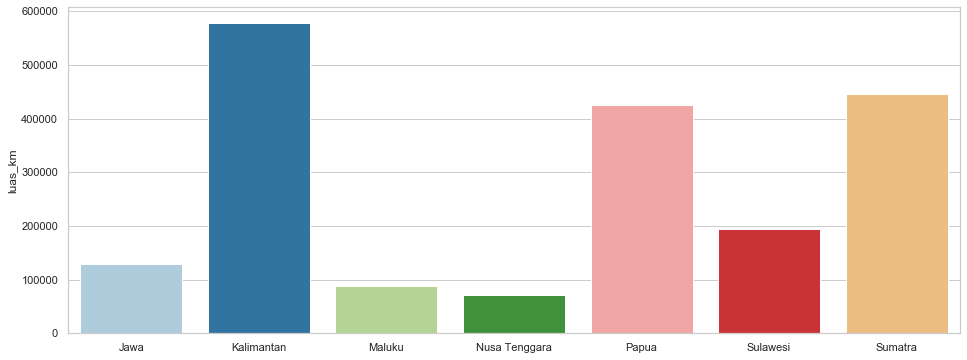

In [54]:
plt.figure(figsize=(16, 6))

sns.barplot(islands, group_by_island['luas_km'], palette="Paired")

plt.show()

Although Jawa island has highest number of population, but it has relatively small land area. The largest island is Kalimantan, followed by Sumatra and Papua. The smallest island is Nusa Tenggara.

**Visualization of Indonesia population density by islands**

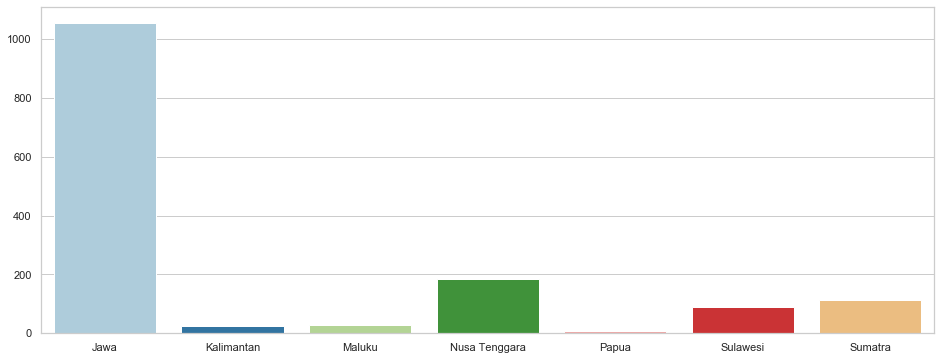

In [55]:
density = group_by_island['populasi'] / group_by_island['luas_km']

plt.figure(figsize=(16, 6))

sns.barplot(islands, density, palette="Paired")

plt.show()

With its very high number of population and relatively small island, Jawa island has highest number in popultion density, even so much higher than other island's population density. Papua island, with their very low number of population but relatively large island, has lowest number of population density.

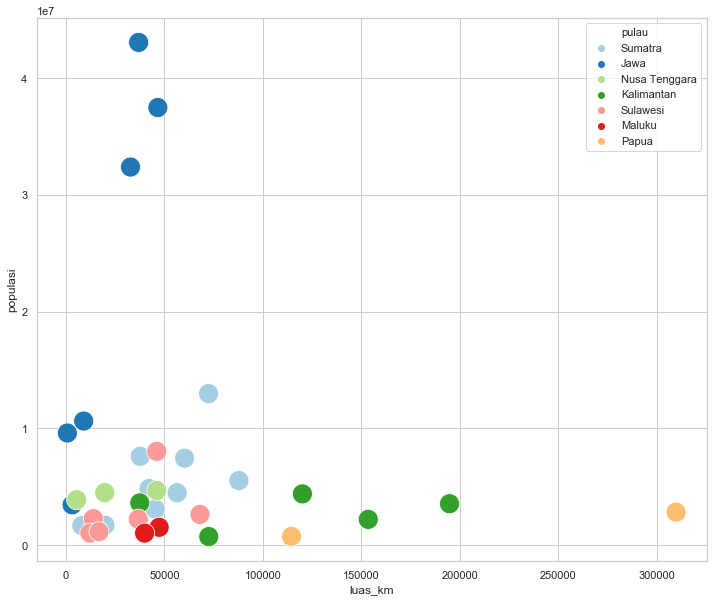

In [53]:
plt.figure(figsize=(12, 10))

sns.scatterplot(demografi_df['luas_km'], demografi_df['populasi'], hue=demografi_df['pulau'], s=400, palette="Paired")

plt.show()

From above scatter plot, we can learn that provinces in **Jawa** island have relatively small land area with varying number of population. Provinces in **Kalimantan** and **Papua** have small number of population with varying number of land area. Provinces in **Sumatra**, **Sulawesi**, **Maluku** and **Nusa Tenggara** island have relatively small number of population and small land area too. 